# Multiclass Classification :

---

## Problem Statement:


The dataset for this problem might seem peculiar in the first look, but this is how LLM's actually see and use the data. LLM's are based on the concept of vector embeddings which tries to capture the semantic relation between in the words in a sentence.

**What are Vector embeddings ?**

- Vector embeddings are numerical representations that capture the relationships and meaning of words, phrases and other data types. Through vector embeddings, essential characteristics or features of an object are translated into a concise and organized array of numbers, helping computers rapidly retrieve information.

For instance, 
- Notice how the distance between vector embeddings of 'King' and 'Man' is similar to the distance between that of 'Queen' and 'Woman'.
- Similarly, the distance between between vector embeddings of 'King' and 'Queen' is similar to that of 'Man' and 'Woman', implying a similar relation between both.

<p align="center">
  <img src="https://www.researchgate.net/profile/Peter-Sutor/publication/332679657/figure/fig1/AS:809485488640000@1570007788866/The-classical-king-woman-man-queen-example-of-neural-word-embeddings-in-2D-It.png" />
</p>



**How does this work?**
- For any query or a 'prompt' that a user enters, they are first converted into these vector embeddings and after feature engineering in a certain way, metrics, such as *'cosine similarity'* scores are used to retrieve information that are most closely related to the given 'prompt'.
- Every LLM, i.e Google's BERT, Open AI's Chat GPT, uses a different model to convert sentences/documents into vector embeddings.
- This is exactly how search engines such as "Google" work as well.


---

## Dataset Description :

The dataset below contains the vector embeddings of 54,000 rows which have been put into 10 classes.
The objective is to develop a predictive model that can accurately take a set of vector embeddings as input and put them into a given class.

## Aim:
* To perform multi-class classification on the listed vector embeddings.

## Dataset Attributes
Here is a brief overview of the dataset columns: 

| Column Name | Description |
| --- | --- |
| **Content** | A NumPy array of floating point numbers that contain the vector embeddings of a given sentence   |
| **Class**   | The numerical classes that each of the sentence were separated into based on the content in them |


---
## Load the dataset :

In [235]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import boxcox
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from imblearn.under_sampling import RandomUnderSampler


In [233]:
# load dataset 
train = pd.read_pickle('./data/train.pkl', compression = 'gzip')


# Questions
**Instructions:**
1.  Answer all questions.

2.  Justify your answers with appropriate reasoning, code, or calculations.

3.  Ensure your code is well-commented to explain your logic.

4.  Total Marks: 100

---

## Question 1 : Data Analysis (10 pts)

- Summarize the data. How much data is present? What is the shape of the dataset? What is the shape of each row?

- Convert the array of values into columns such that each value of the array represents a 'feature' of the sentence. This should leave you with a dataset with 384 columns with features and 1 column with the target variable.

- Try to Analyze and discuss the relationships between the attributes.

- Use appropriate visualization techniques to visualize the features.

In [196]:
train.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
20219  -0.441182   0.039758  -0.096716  -0.325088  -0.281903   0.396630   
10100   0.005069   0.062893   0.332654  -0.268345   0.351607   0.179265   
6202   -0.238280   0.062563   0.580820  -0.308987   0.168390   0.464604   
6248    0.191293   0.693149   0.100221  -0.074036   0.283898   0.199221   
20758  -0.038615   0.102616   0.350334  -0.167825   0.520621   0.019089   

       feature_6  feature_7  feature_8  feature_9  ...  feature_375  \
20219   0.479592   0.022123   0.037306   0.100461  ...     0.090767   
10100   1.085914   0.137451  -0.215401  -0.238715  ...    -0.470249   
6202    0.770424   0.408037  -0.604461  -0.245012  ...    -0.651022   
6248    0.677960   0.240535   0.181713  -0.235484  ...    -0.074472   
20758   0.123427   0.810578   0.121413  -0.159571  ...    -0.437117   

       feature_376  feature_377  feature_378  feature_379  feature_380  \
20219     0.132293    -0.072522    -0.489568     0.183016    -0.075469   
10100    -0.016706    -0.171675     0.025053     0.345940    -0.380571   
6202     -0.129468     0.136676     0.012791    -0.058777    -0.583225   
6248     -0.355305    -0.327696    -0.150666     0.329692    -0.162642   
20758    -0.680356    -0.446885    -0.179272    -0.119086    -0.672074   

       feature_381  feature_382  feature_383  target  
20219    -0.304630     0.639570     0.244022      10  
10100    -0.011566     0.182901     0.450810       7  
6202     -0.848802     0.374475     0.141444       8  
6248     -0.361339     0.279542     0.182272       1  
20758    -0.017897     0.165097     0.082835       6  

[5 rows x 385 columns]

In [197]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54000 entries, 20219 to 23720
Columns: 385 entries, feature_0 to target
dtypes: float32(384), int64(1)
memory usage: 79.9 MB


In [198]:
train.shape
print('No of Rows in dataset',train.shape[0])
print('No of Columns in dataset',train.shape[1])

No of Rows 54000
No of Columns 385


In [117]:
#sample row 
train.iloc[0]

feature_0      -0.441182
feature_1       0.039758
feature_2      -0.096716
feature_3      -0.325088
feature_4      -0.281903
                 ...    
feature_380    -0.075469
feature_381    -0.304630
feature_382     0.639570
feature_383     0.244022
target         10.000000
Name: 20219, Length: 385, dtype: float64

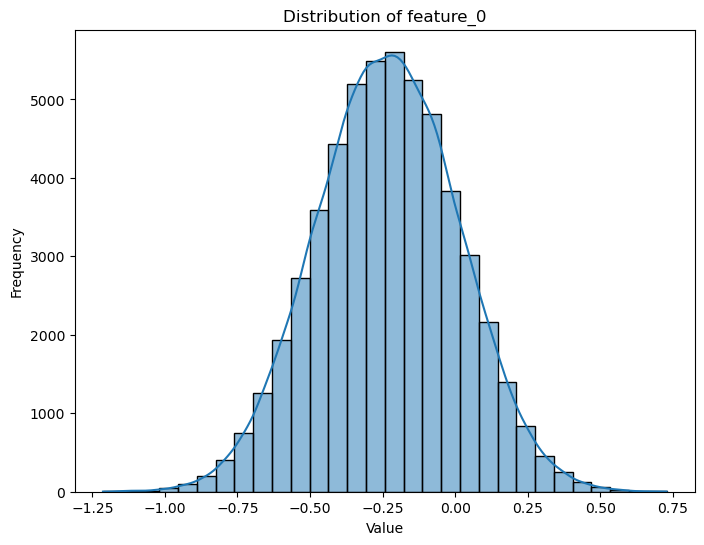

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(train['feature_0'], bins=30, kde=True)
plt.title('Distribution of feature_0')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

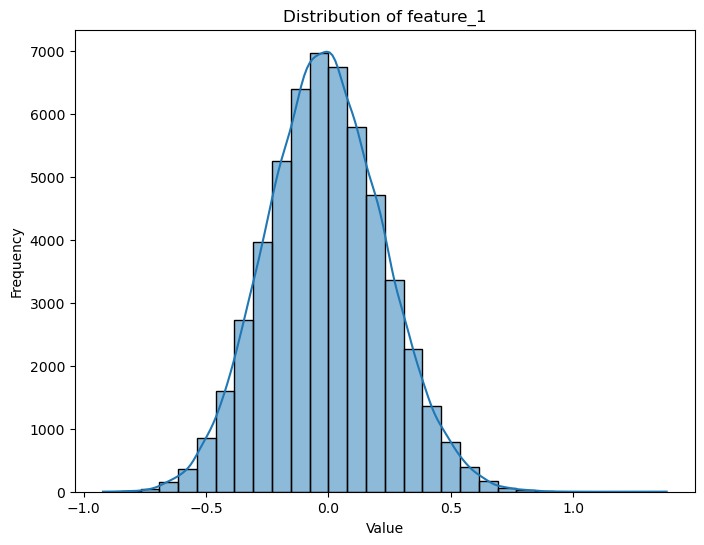

In [200]:
plt.figure(figsize=(8, 6))
sns.histplot(train['feature_1'], bins=30, kde=True)
plt.title('Distribution of feature_1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

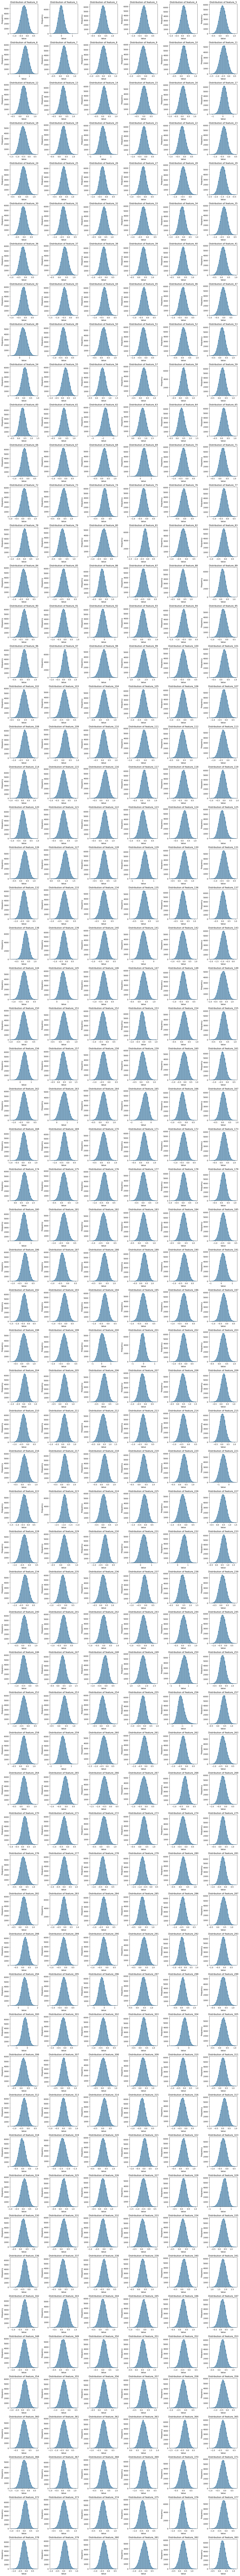

In [232]:
max_subplots_per_row = 6

# Limit the number of features to visualize
features_to_visualize = train.columns[:-1]  # Exclude the target column
num_features = 384  # Adjust the multiplier as needed

# Calculate the number of rows and columns in the grid
num_rows = (num_features - 1) // max_subplots_per_row + 1
num_cols = 6

# Set the figure size
plt.figure(figsize=(18, num_rows * 3))

# Loop through each feature and create a subplot
for i, feature in enumerate(features_to_visualize[:num_features]):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(train[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

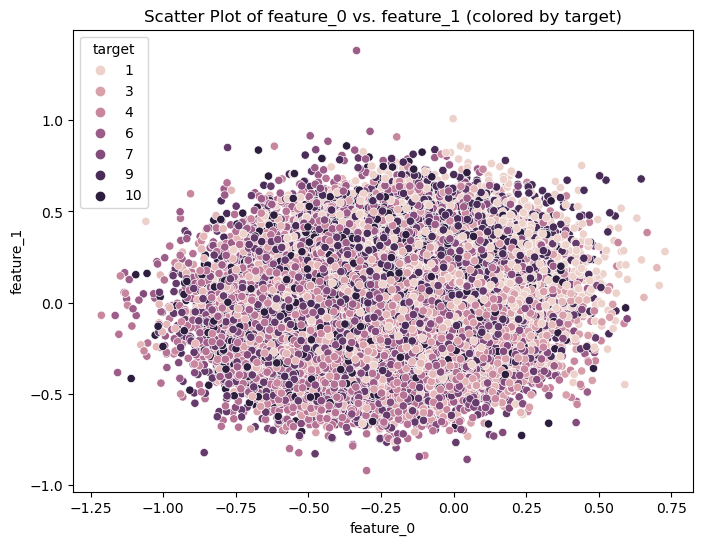

In [206]:
# Scatter plot of feature_0 vs. feature_1 colored by target
plt.figure(figsize=(8, 6))
sns.scatterplot(x='feature_0', y='feature_1', hue='target', data=train)
plt.title('Scatter Plot of feature_0 vs. feature_1 (colored by target)')
plt.xlabel('feature_0')
plt.ylabel('feature_1')
plt.show()

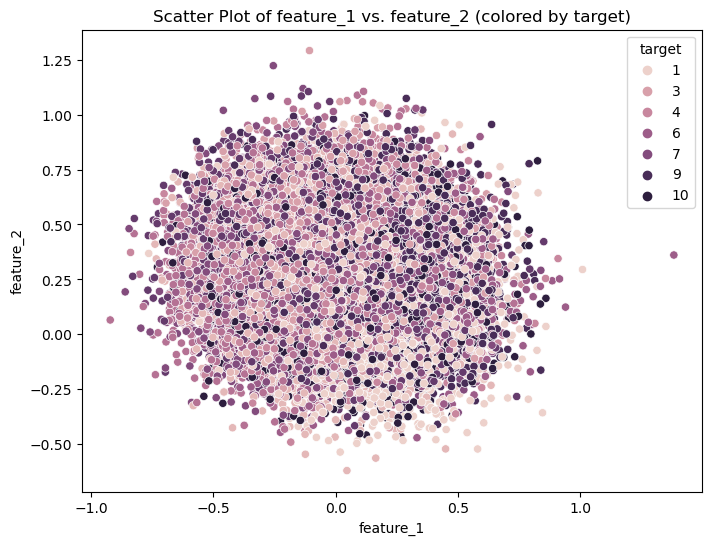

In [244]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='feature_1', y='feature_2', hue='target', data=train)
plt.title('Scatter Plot of feature_1 vs. feature_2 (colored by target)')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.show()

In [245]:
# Correlation Heatmap
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Frequency Distribution Plots:
* All features in the dataset exhibit a binomial distribution.
* The frequency distribution plots show a characteristic shape indicative of binomial distributions for each feature.

#### Scatter Plots:
* Scatter plots of any two features do not reveal any significant relationship between the features.
* There is no discernible pattern or trend in the scatter plots, suggesting a lack of linear or nonlinear correlation between the features.

To summarize, These observations provide insights into the distributional properties of the features and the relationships between them. The binomial distribution pattern suggests that the features may represent binary outcomes or count data, while the lack of significant relationships in scatter plots indicates independence or weak association between the features.



---

## Question 2 : PCA (10 pts)

- Perform Principal Component Analysis (PCA) with 100 components

- Visualize the explained variance for principal components

- Perform clustering analysis with top 2 components with highest explained variance and visualize the result in scatter plot.

In [219]:
X = train.drop(columns=['target']) # drop target column
y = train['target']

In [220]:
# Intialize StandardScaler to standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
# Fitting the scaler to the data and transforming it
X_scaled = scaler.fit_transform(X)


In [221]:
# Intialize PCA with the 100 components
pca = PCA(n_components=100)
# Applying PCA to the X_sclaed to reduce dimensionality
# PCA will find the principal components that capture the most variance in the data
X_pca = pca.fit_transform(X_scaled)


In [168]:
X_pca.shape

(54000, 100)

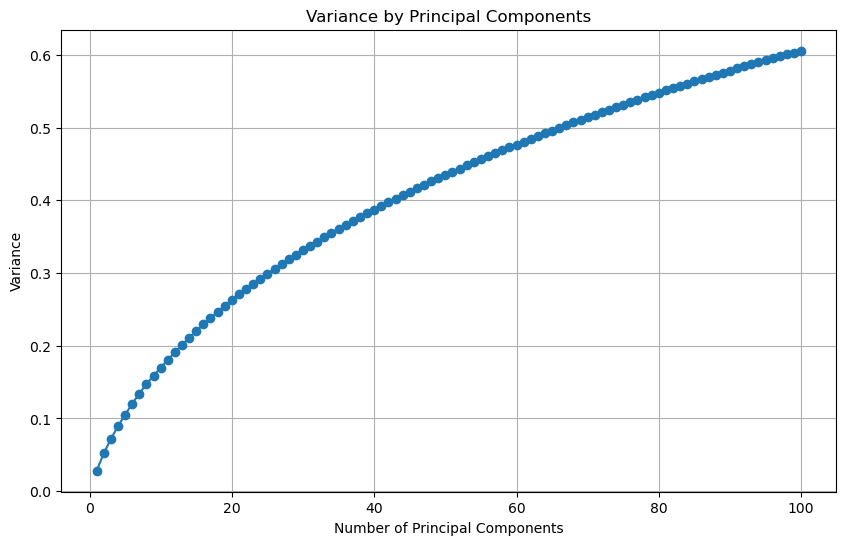

In [241]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance')
plt.grid(True)
plt.show()


In [37]:
#Intialize PCA with the 2 components
pca_2 = PCA(n_components=2)
# Applying PCA to the X_sclaed to reduce dimensionality to 2
X_pca_2 = pca_2.fit_transform(X_scaled)

In [242]:
# performing K means with n_cluster as 10 on dataset with top 2 dimensions with highest variance using PCA
kmeans = KMeans(n_clusters=10, random_state=42)  
kmeans.fit(X_pca_2)
clusters = kmeans.labels_

/Users/rishi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


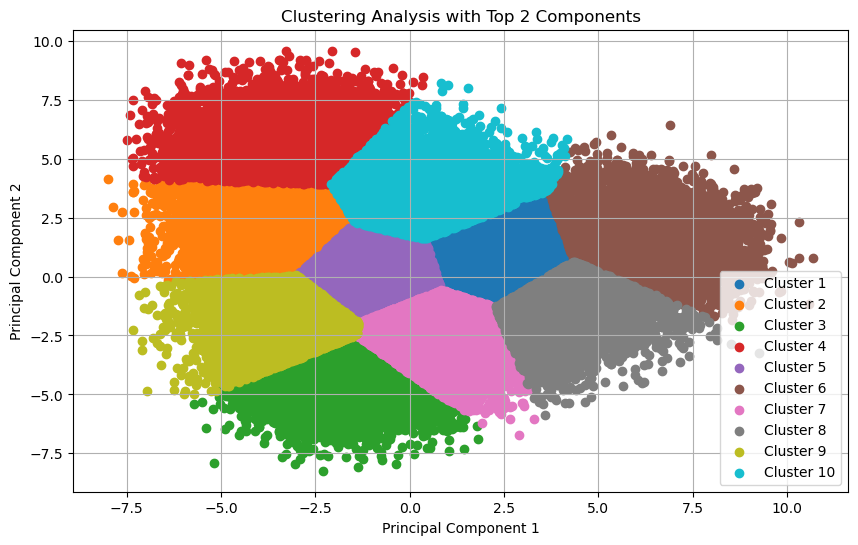

In [39]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.scatter(X_pca_2[clusters == i, 0], X_pca_2[clusters == i, 1], label=f'Cluster {i+1}')

plt.title('Clustering Analysis with Top 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

After performing PCA for 100 components, It is observed that variance is 0.6 which shows that using 100 columns Dataset can retain around 60 percent of the data with 384 columns


---

## Question 2 : Data Pre-processing & Feature Engineering (10 pts)

- Perform Feature Engineering on the dataset.

- Hint: you can use the reduced number of features from PCA for more efficient feature processing


In [222]:
# Intialize StandardScaler to standardize features by removing the mean and scaling to unit variance
scaler_2 = StandardScaler()
# Fitting the scaler to the data after pca and transforming it
X_scaled_pca = scaler_2.fit_transform(X_pca)

In [185]:
# Intialize RandomForestClassifier with 100 estimators
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier to the data after PCA transformation
rf.fit(X_scaled_pca, y)

# Get feature importances from the trained random forest model
feature_importances = rf.feature_importances_

# Sort in decreasing order
indices = np.argsort(feature_importances)[::-1]

In [ ]:
# Data with top 60 features from RandomForestClassier
top_60_indices = indices[:60]
X_60= X_scaled_pca[:, top_60_indices]

In [212]:
# Data with top 80 features from RandomForestClassier
top_80_indices = indices[:80]
X_80 = X_scaled_pca[:, top_80_indices]

In [ ]:
# Data with top 100 features from RandomForestClassier
top_100_indices = indices[:100]
X_100 = X_scaled_pca[:, top_100_indices]

In [145]:
scaler_3 = MinMaxScaler()
X_scaled_non_negative = scaler_3.fit_transform(X_scaled)
# Data with top 60 features from Chi-squared test
X_60_chi = SelectKBest(chi2, k=60).fit_transform(X_scaled_non_negative, y)
# Data with top 80 features from Chi-squared test
X_80_chi = SelectKBest(chi2, k=80).fit_transform(X_scaled_non_negative, y)
# Data with top 100 features from Chi-squared test
X_100_chi = SelectKBest(chi2, k=100).fit_transform(X_scaled_non_negative, y)


Using Randomforest Classifier and chi-squared test 
From the 100 columns after PCA 60 ,80 100 best features selected datasets are created and tested for the best performing model

---
## Question 3 : Modeling (20 pts)

- Train at least ***three*** different classifier models (e.g., SVM, Logistic Regression, KNN, etc.) and optimize hyperparameters to enhance performance. 

- Implement a validation pipeline utilizing K-fold cross-validation and your choice of dimensionality reduction technique to choose the best (Model + Number of features). For each classifier, report classification accuracy, precision, recall, and F1 score with both macro and weighted averages.

- Hint : Use sampling techniques to reduce the dataset size for creating initial models. This would decrease the model run time and would create an intuition about selecting appropriate classification models.

In [237]:

# Sampling data to reduce dataset size
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_scaled_pca, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



# Define classifiers
classifiers = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier()
}

# Define hyperparameters for grid search
param_grids = {
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf','linear']},
    'Logistic Regression': {'C': [0.1, 1, 10], 'penalty': [ 'l2']},
    'KNN': {'n_neighbors': [3, 5, 7, 9]}
}

scoring = {'accuracy': 'accuracy',
           'precision_macro': 'precision_macro',
           'recall_macro': 'recall_macro',
           'f1_macro': 'f1_macro',
           'precision_weighted': 'precision_weighted',
           'recall_weighted': 'recall_weighted',
           'f1_weighted': 'f1_weighted'}

# Perform K-fold cross-validation and hyperparameter tuning
results = {}
for name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grids[name], scoring=scoring, refit=False, cv=StratifiedKFold(n_splits=5), n_jobs=-1)
    grid_search.fit(X_train, y_train)
    results[name] = grid_search.cv_results_

for name, result in results.items():
    print(f"\n{name}:")
    print("Best Parameters:", result['params'][np.argmin(result['rank_test_accuracy'])])
    print("Best Accuracy:", result['mean_test_accuracy'][np.argmin(result['rank_test_accuracy'])])
    print("Best Precision (Macro):", result['mean_test_precision_macro'][np.argmin(result['rank_test_accuracy'])])
    print("Best Recall (Macro):", result['mean_test_recall_macro'][np.argmin(result['rank_test_accuracy'])])
    print("Best F1 Score (Macro):", result['mean_test_f1_macro'][np.argmin(result['rank_test_accuracy'])])
    print("Best Precision (Weighted):", result['mean_test_precision_weighted'][np.argmin(result['rank_test_accuracy'])])
    print("Best Recall (Weighted):", result['mean_test_recall_weighted'][np.argmin(result['rank_test_accuracy'])])
    print("Best F1 Score (Weighted):", result['mean_test_f1_weighted'][np.argmin(result['rank_test_accuracy'])])


In [130]:
best_log_reg_model = LogisticRegression(C=0.1,penalty='l2')
best_log_reg_model.fit(X_scaled_pca, y)

LogisticRegression(C=0.1)

In [230]:
best_knn_model = KNeighborsClassifier(n_neighbors= 9)
best_knn_model.fit(X_scaled_pca, y)

KNeighborsClassifier(n_neighbors=9)

In [231]:
best_svc_model = SVC(C= 1, gamma= 0.01, kernel= 'rbf')
best_svc_model.fit(X_scaled_pca, y)

SVC(C=1, gamma=0.01)

Using a machine learning pipeline to train and evaluate three classifiers SVM, Logistic Regression, and KNN on a preprocessed dataset. 

Used RandomUnderSampler to address class imbalance and reducing dataset size for faster evaluation, then split it into training and testing sets, and performs hyperparameter tuning using GridSearchCV with K-fold cross-validation. 

Evaluation metrics such as accuracy, precision, recall, and F1-score are used to compare classifier performance.

The best parameters and corresponding metrics for each classifier are then printed for analysis. We found SVM to be performing the best among these three models using 100 features.

---
## Question 4 : Evaluation and Reporting(20 pts)

- Divide the train dataset into 2 sets : Training set + Validation set

- Select the model that is expected to performs optimally on the Validation set and provide the predictions accordingly. Give clear conclusions

In [224]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled_pca, y, test_size=0.2, random_state=42)
best_svc_model = SVC(C= 1, gamma= 0.01, kernel= 'rbf')
best_svc_model.fit(X_train, y_train)
y_val_pred = best_svc_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.7374074074074074


---
## Question 5 : External Evaluation  (30 pts)

- A dataset named ‘test.csv’ is provided to you which has 6000 vector embeddings. You have to choose the best model(the model which has the highest score) and then use that model to predict the label on the ‘test.csv’.

- After prediction, you will get an array numerical classes from 1-10. Convert that array to csv file, name it as ‘submission.csv’ and submit that ‘submission.csv’ file.

In [226]:
# step 1. Load the  data
test = pd.read_pickle('./data/test.pkl', compression = 'gzip')

# step 2. Pre-process the test data. You can use the same pre processing methods which you used for the train dataset earlier
X_test_scaled = scaler.transform(test)
X_test_pca = pca.transform(X_test_scaled)
X_test_scaled_pca = scaler_2.transform(X_test_pca)

# step 3. Choose the best model
your_best_model = best_svc_model

# step 4. Make predictions
y_pred = your_best_model.predict(X_test_scaled_pca)

# step 5. Save output as csv file
pred = pd.DataFrame(y_pred)
pred.to_csv('./submission.csv', index = False)

---
## Hint - Final evaluation metrics

The following function will be used to calculate the final scores of your model. 

So you can use it optimize your model and get a relative score of your submission in order to calculate the evaluation metrics.

In [243]:
# use the below function to evaluate the models  
from sklearn.metrics import f1_score
def evaluation_metrics(y_true, y_pred):
    score = f1_score ('','', average='macro')
    return score